In [7]:
!pip install missingno
import pandas as pd
import gc
!pip install lightgbm
!pip install xgboost

# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 결측치 시각화를 위한 라이브러리
import missingno

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [14]:
# 파일 경로 패턴 설정
file_paths = glob.glob('C:/Users/신수경/Desktop/수경/멋쟁이사자처럼/파이널 프로젝트/DATA/train/4.청구입금정보/*.parquet')

# 파일들을 읽어서 리스트에 담고 모두 concat
df_list = [pd.read_parquet(path) for path in file_paths]
bill_df = pd.concat(df_list, ignore_index=True)

# 확인
print(bill_df.shape)
bill_df.head()

(2400000, 46)


,기준년월,ID,대표결제일,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,...,할인금액_청구서_B0M,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액
0,201807,TRAIN_000000,27,자동이체,미확인,당사페이앱+이메일,문자메세지,1,1,1,...,0,5,3,0,0,1,0,3,0,0
1,201807,TRAIN_000001,13,자동이체,주거지,우편,우편,1,1,1,...,163,6,3,0,0,0,0,0,0,0
2,201807,TRAIN_000002,1,자동이체,미확인,이메일,이메일,1,1,1,...,0,6,3,0,0,0,0,121,0,50
3,201807,TRAIN_000003,5,자동이체,주거지,우편,우편,1,1,1,...,0,5,3,2,0,0,0,3,0,2
4,201807,TRAIN_000004,13,자동이체,주거지,우편,우편,0,1,1,...,0,1,1,0,0,0,0,0,0,0


In [16]:
# 데이터 프레임 정보 확인
bill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 46 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   기준년월              int64 
 1   ID                object
 2   대표결제일             int64 
 3   대표결제방법코드          object
 4   대표청구지고객주소구분코드     object
 5   대표청구서수령지구분코드      object
 6   청구서수령방법           object
 7   청구서발송여부_B0        int64 
 8   청구서발송여부_R3M       int64 
 9   청구서발송여부_R6M       int64 
 10  청구금액_B0           int64 
 11  청구금액_R3M          int64 
 12  청구금액_R6M          int64 
 13  포인트_마일리지_건별_B0M   int64 
 14  포인트_마일리지_건별_R3M   int64 
 15  포인트_포인트_건별_B0M    int64 
 16  포인트_포인트_건별_R3M    int64 
 17  포인트_마일리지_월적립_B0M  int64 
 18  포인트_마일리지_월적립_R3M  int64 
 19  포인트_포인트_월적립_B0M   int64 
 20  포인트_포인트_월적립_R3M   int64 
 21  포인트_적립포인트_R12M    int64 
 22  포인트_적립포인트_R3M     int64 
 23  포인트_이용포인트_R12M    int64 
 24  포인트_이용포인트_R3M     int64 
 25  포인트_잔여포인트_B0M     int64 
 26  마일_적립포인트_R12M     int64 
 27  마일_적립포인트_R3M

In [18]:
# 결측치 확인
bill_df.isna().sum()

기준년월                0
ID                  0
대표결제일               0
대표결제방법코드            0
대표청구지고객주소구분코드       0
대표청구서수령지구분코드        0
청구서수령방법             0
청구서발송여부_B0          0
청구서발송여부_R3M         0
청구서발송여부_R6M         0
청구금액_B0             0
청구금액_R3M            0
청구금액_R6M            0
포인트_마일리지_건별_B0M     0
포인트_마일리지_건별_R3M     0
포인트_포인트_건별_B0M      0
포인트_포인트_건별_R3M      0
포인트_마일리지_월적립_B0M    0
포인트_마일리지_월적립_R3M    0
포인트_포인트_월적립_B0M     0
포인트_포인트_월적립_R3M     0
포인트_적립포인트_R12M      0
포인트_적립포인트_R3M       0
포인트_이용포인트_R12M      0
포인트_이용포인트_R3M       0
포인트_잔여포인트_B0M       0
마일_적립포인트_R12M       0
마일_적립포인트_R3M        0
마일_이용포인트_R12M       0
마일_이용포인트_R3M        0
마일_잔여포인트_B0M        0
할인건수_R3M            0
할인금액_R3M            0
할인건수_B0M            0
할인금액_B0M            0
할인금액_청구서_R3M        0
할인금액_청구서_B0M        0
상환개월수_결제일_R6M       0
상환개월수_결제일_R3M       0
선결제건수_R6M           0
선결제건수_R3M           0
연체건수_R6M            0
연체건수_R3M            0
혜택수혜금액_R3M          0
포인트_마일리지_환산_B0M     0
혜택수혜금액    

In [20]:
na_counts = bill_df.isna().sum()
na_counts = na_counts[na_counts > 0]
print(na_counts.to_frame(name='결측치 개수'))

Empty DataFrame
Columns: [결측치 개수]
Index: []


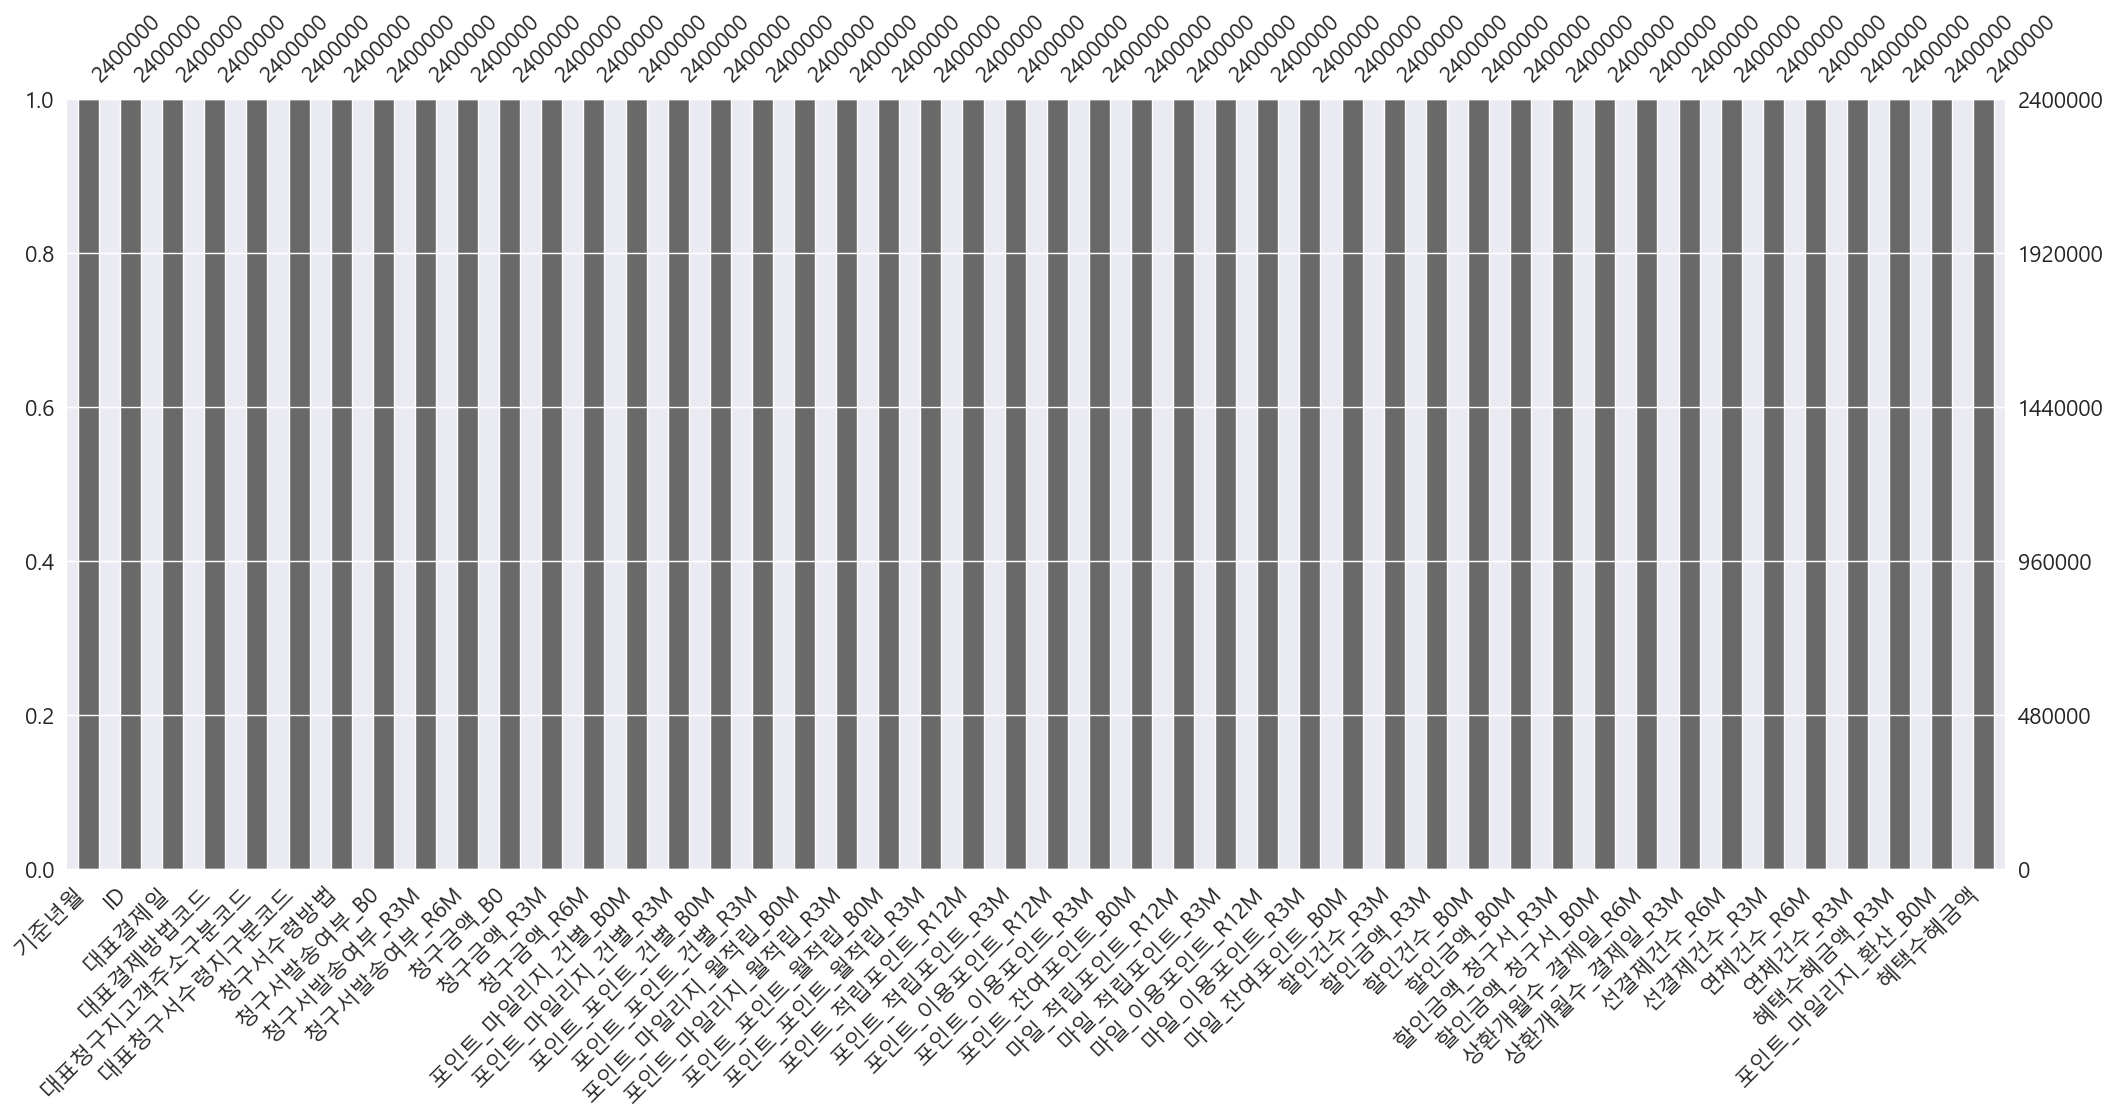

In [22]:
# 각 컬럼별 결측치 현황을 막대 그래프 형태로 확인해본다.
# 결측치를 제외한 데이터 개수
missingno.bar(bill_df)
plt.show()

<Axes: >

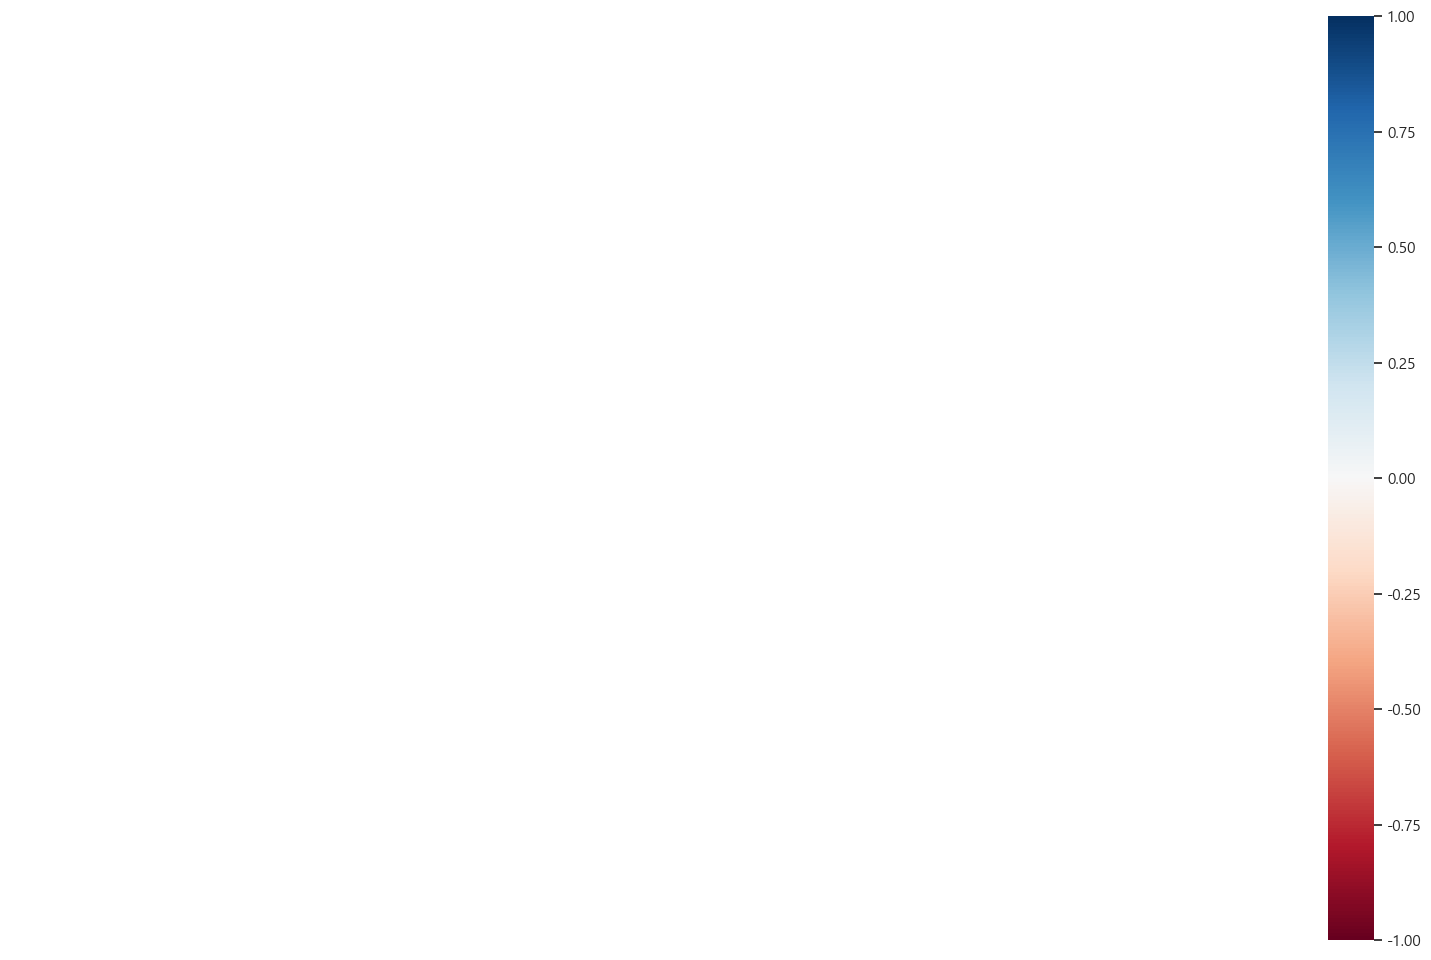

In [24]:
# 양의 상관 관계 : 하나의 변수에서 값이 누락될 때 다른 변수에서도 값이 누락될 가능성이 높은 것
# 음의 상관 관계 : 하나의 변수에서 값이 누락될 때 다른 변수에서는 값이 누락될 가능성이 낮은 것
# 0에 가까울 : 두 변수 값의 결측치값 유무가 서로 독립적이다.
missingno.heatmap(bill_df)

<Axes: >

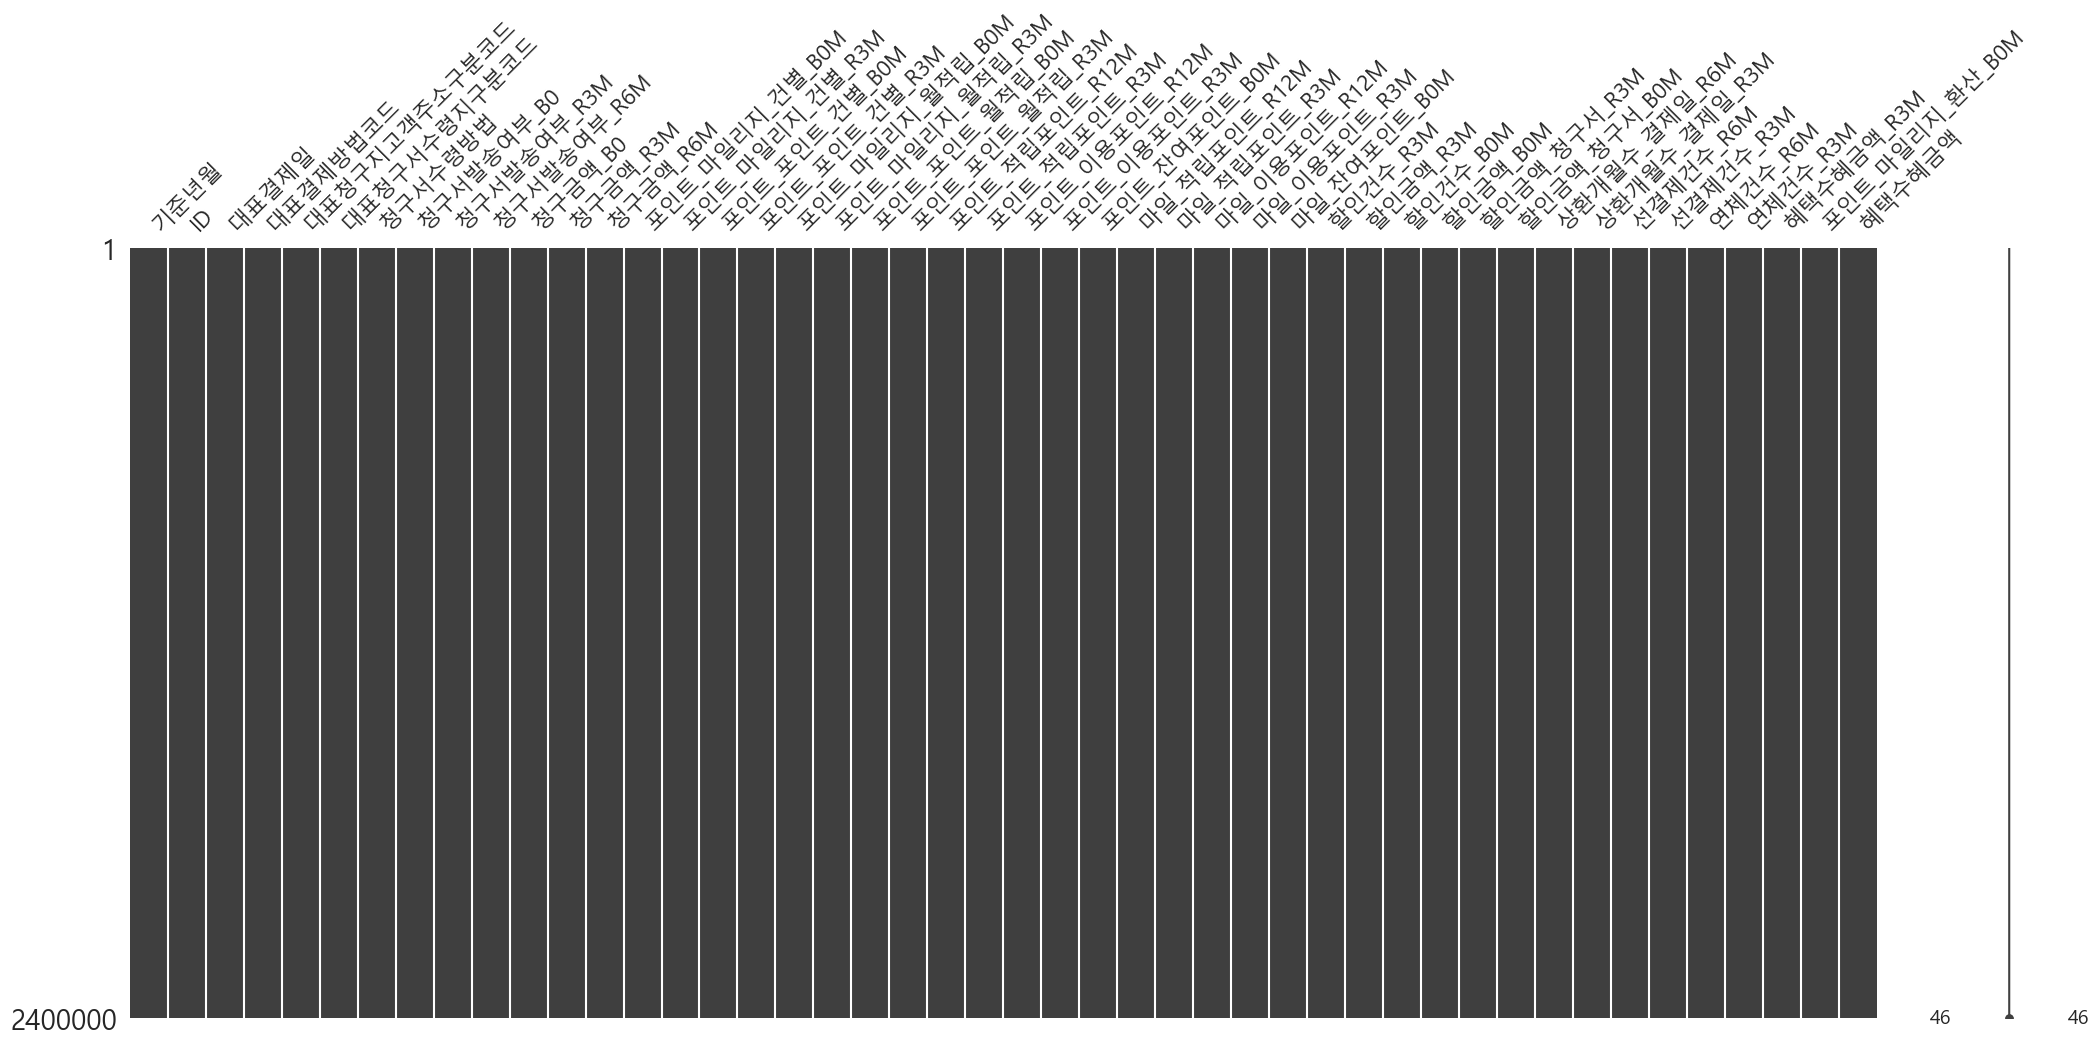

In [26]:
# 각 행별로 결측치가 어느 행에 있는지를 시각화한다.
missingno.matrix(bill_df)

In [9]:
bill_df['Segment'].value_counts()

Segment
E    1922052
D     349242
C     127590
A        972
B        144
Name: count, dtype: int64

In [28]:
# 결측치가 없는 컬럼들만 선택
bill_df_no_na = bill_df.dropna(axis=1)

# 결과 확인
print(f"원본 컬럼 수: {bill_df.shape[1]}")
print(f"결측치 없는 컬럼 수: {bill_df_no_na.shape[1]}")

원본 컬럼 수: 46
결측치 없는 컬럼 수: 46


In [30]:
# 결측치가 있는 컬럼 제거
bill_df_no_na = bill_df.dropna(axis=1)
bill_df_no_na.shape[1]

46

In [39]:
# CSV 파일로 저장
bill_df_no_na.to_csv('bill_청구입금정보.csv', index=False, encoding='utf-8')
print("저장 완료")

저장 완료


In [41]:
df = pd.read_csv('bill_청구입금정보.csv')
df

,기준년월,ID,대표결제일,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,...,할인금액_청구서_B0M,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액
0,201807,TRAIN_000000,27,자동이체,미확인,당사페이앱+이메일,문자메세지,1,1,1,...,0,5,3,0,0,1,0,3,0,0
1,201807,TRAIN_000001,13,자동이체,주거지,우편,우편,1,1,1,...,163,6,3,0,0,0,0,0,0,0
2,201807,TRAIN_000002,1,자동이체,미확인,이메일,이메일,1,1,1,...,0,6,3,0,0,0,0,121,0,50
3,201807,TRAIN_000003,5,자동이체,주거지,우편,우편,1,1,1,...,0,5,3,2,0,0,0,3,0,2
4,201807,TRAIN_000004,13,자동이체,주거지,우편,우편,0,1,1,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,25,자동이체,주거지,우편,우편,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2399996,201812,TRAIN_399996,20,자동이체,미확인,이메일,이메일,1,1,1,...,0,6,3,0,0,0,0,164,0,53
2399997,201812,TRAIN_399997,20,자동이체,회사,우편,우편,1,1,1,...,0,6,3,0,0,0,0,0,0,0
2399998,201812,TRAIN_399998,20,자동이체,주거지,우편,우편,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df2 = pd.read_csv('train_회원정보.csv')
df2

,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201807,TRAIN_000000,2,40대,D,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),22
1,201807,TRAIN_000001,1,30대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),18
2,201807,TRAIN_000002,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,20
3,201807,TRAIN_000003,2,40대,D,1,1,0,1,2,...,0,0,0,0개,0개,0개,0개,1,자녀성장(2),17
4,201807,TRAIN_000004,2,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,1,자녀성장(1),15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,2,70대이상,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,노년생활,39
2399996,201812,TRAIN_399996,2,50대,D,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),24
2399997,201812,TRAIN_399997,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,18
2399998,201812,TRAIN_399998,1,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),27


In [45]:
# 필요한 컬럼만 추출해서 df2를 준비
df2_reduced = df2[['ID', '기준년월', 'Segment']]

# ID와 기준년월 기준으로 병합 (inner 또는 left join 가능)
df_merged = pd.merge(df, df2_reduced, on=['ID', '기준년월'], how='left')

In [47]:
df_merged

,기준년월,ID,대표결제일,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,...,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액,Segment
0,201807,TRAIN_000000,27,자동이체,미확인,당사페이앱+이메일,문자메세지,1,1,1,...,5,3,0,0,1,0,3,0,0,D
1,201807,TRAIN_000001,13,자동이체,주거지,우편,우편,1,1,1,...,6,3,0,0,0,0,0,0,0,E
2,201807,TRAIN_000002,1,자동이체,미확인,이메일,이메일,1,1,1,...,6,3,0,0,0,0,121,0,50,C
3,201807,TRAIN_000003,5,자동이체,주거지,우편,우편,1,1,1,...,5,3,2,0,0,0,3,0,2,D
4,201807,TRAIN_000004,13,자동이체,주거지,우편,우편,0,1,1,...,1,1,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,25,자동이체,주거지,우편,우편,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2399996,201812,TRAIN_399996,20,자동이체,미확인,이메일,이메일,1,1,1,...,6,3,0,0,0,0,164,0,53,D
2399997,201812,TRAIN_399997,20,자동이체,회사,우편,우편,1,1,1,...,6,3,0,0,0,0,0,0,0,C
2399998,201812,TRAIN_399998,20,자동이체,주거지,우편,우편,0,0,0,...,0,0,0,0,0,0,0,0,0,E
